# Blob-检测

In [1]:
import numpy as np
import cv2
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
src = cv2.imread('../datas/blob.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/blob.jpg',0)

In [7]:
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()
detector = cv2.SimpleBlobDetector_create(params)
# Detect blobs.
keypoints = detector.detect(gray)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(rgb, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 

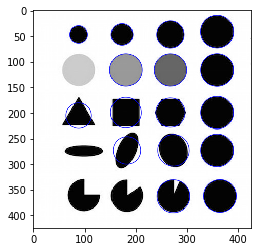

In [8]:
plt.imshow(im_with_keypoints)

In [9]:
def create_blob_detector(roi_size=(128, 128), blob_min_area=3, 
                         blob_min_int=.5, blob_max_int=.95, blob_th_step=10):
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = blob_min_area
    params.maxArea = roi_size[0]*roi_size[1]
    params.filterByCircularity = False
    params.filterByColor = False
    params.filterByConvexity = False
    params.filterByInertia = False
    # blob detection only works with "uint8" images.
    params.minThreshold = int(blob_min_int*255)
    params.maxThreshold = int(blob_max_int*255)
    params.thresholdStep = blob_th_step
    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3:
        return cv2.SimpleBlobDetector(params)
    else:
        return cv2.SimpleBlobDetector_create(params) 